In [1]:
import dukit
import os
import numpy as np
import logging 

/home/samsc/src/qs/dukit/src/dukit/driftcorrect.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
here = os.getcwd()
with open(
    os.path.dirname(here) + "/TEST_DATA_PATH.py", encoding="utf-8"
) as fid:
    exec(fid.read())  # reads in TEST_DATA_PATH string

In [3]:
directory = TEST_DATA_PATH + "drift_corr_test/"
start_num = 9
end_num = 69
comparison_nums = [10, 15, 25, 60, 69]
stub = lambda x: f"ODMR - CW_{x}"
feature_roi = (170, 150, 320, 320)
# feature_roi = (-1, -1, -1, -1)
output_file = directory + "ODMR - CW_10-69"
mask = [True for i in range(9, 70)]
mask[0] = False
system = dukit.Zyla()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

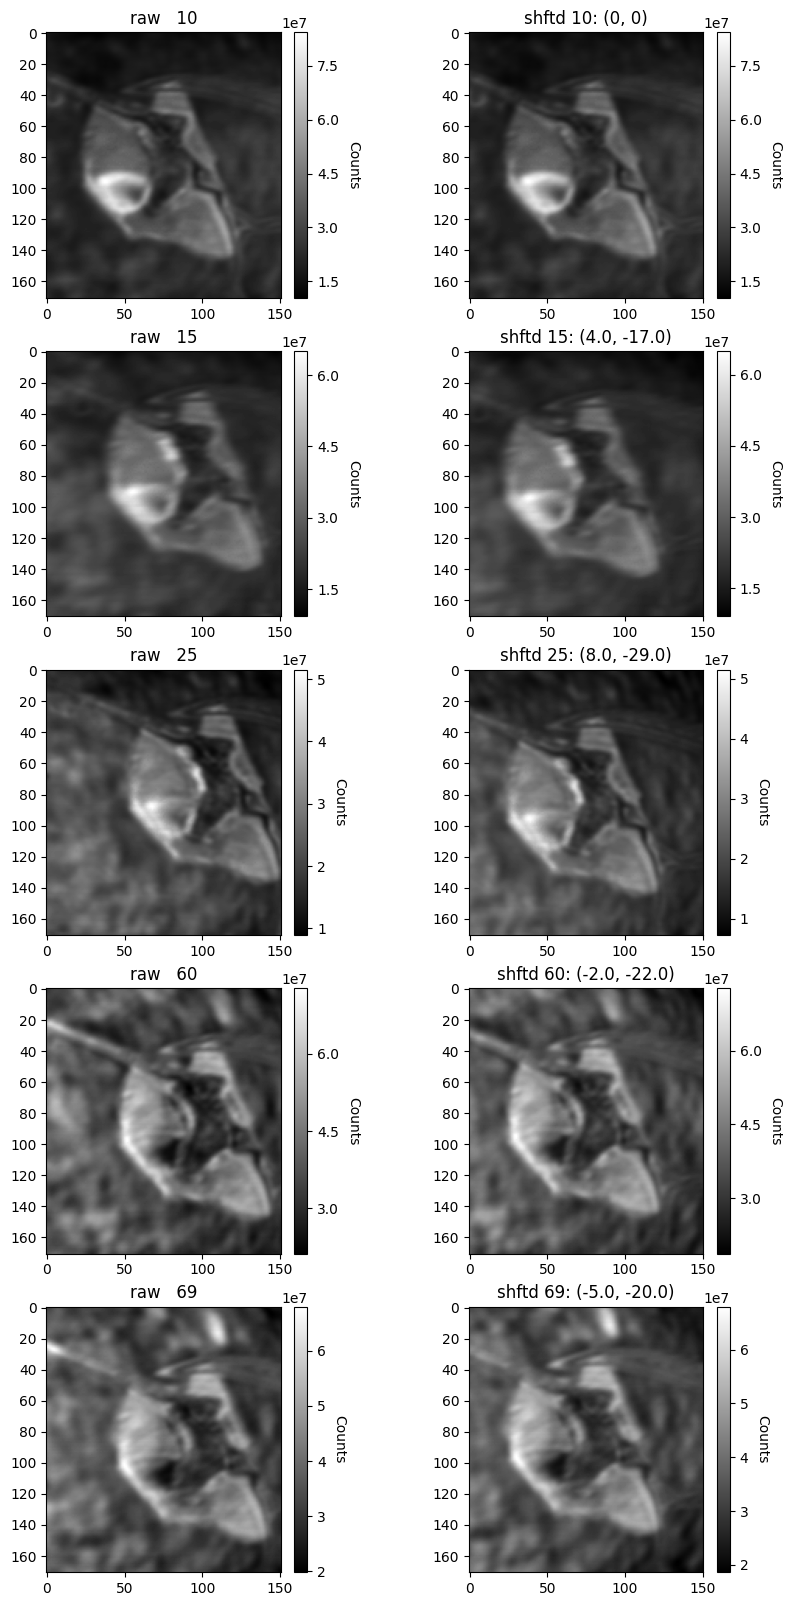

In [4]:
if True:
    dc_plot = dukit.drift_correct_test(
        directory,
        start_num,
        end_num,
        comparison_nums,
        stub,
        system,
        feature_roi,
    )

In [5]:
if False:
    dukit.drift_correct_measurement(
        directory,
        start_num,
        end_num,
        stub,
        system,
        output_file,
        feature_roi,
        image_nums_mask=mask,
    )

### Load raw data

In [6]:
FILEPATH = TEST_DATA_PATH + "drift_corr_test/" + "ODMR - CW_10-69"
ADDITIONAL_BINS = 2
ADDITIONAL_SMOOTH = 0

ROI_COORDS = (45, 30, 100, 80)
AOI_COORDS = ((20, 20, 40, 40),)

FIG_FORMAT = "png"

FIT_BACKEND = "cpufit"
FIT_MODEL = dukit.LinearLorentzians(1)
# GUESSES = {"pos": [3350,], "amp": [0.001,], "fwhm": [50,], "c": [1.0,], "m": [0.0,]}
GUESSES = {"pos": 3350, "amp": 0.001, "fwhm": 50, "c": 1.0, "m": 0.0} # this works too
BOUNDS = {
    "pos_range": 30,
    "amp_range": 0.1,
    "fwhm_range": 50,
    "c_range": 0.1,
    "m_range": 0.01,
}

# === CREATE OUTPUT DIR & set mpl rcparams
OUTPUT_DIR = f"{FILEPATH}_output/"
try:
    os.mkdir(OUTPUT_DIR)
except FileExistsError:
    pass
dukit.mpl_set_run_config()
logging.info(dukit.__version__)
with open(OUTPUT_DIR + "dukit_version.txt", "w") as fid:
    fid.write(dukit.__version__)

FIT_RES_DIR = OUTPUT_DIR + "/data/"
# set below to "" or None or False to *not* load prev fit
PREV_FIT = ""  # FIT_RES_DIR[:]

In [7]:
# === READ IN DATA
sweep_arr = system.read_sweep_arr(FILEPATH)
sig, ref, sig_norm = system.read_image(FILEPATH)
raw_pixel_size = system.get_raw_pixel_size(FILEPATH)

sweep_arr, sig, ref, sig_norm = dukit.crop_sweep(
    sweep_arr, sig, ref, sig_norm, rem_start=2, rem_end=0)


In [8]:
# === SMOOTH
if ADDITIONAL_SMOOTH:
    sig = dukit.smooth_image_stack(sig, ADDITIONAL_SMOOTH)
    ref = dukit.smooth_image_stack(ref, ADDITIONAL_SMOOTH)
    sig_norm = system.norm(sig, ref)

# === REBIN & CROP
sig_rebinned = dukit.rebin_image_stack(sig, ADDITIONAL_BINS)
pl_img = dukit.sum_spatially(sig_rebinned)
sig = dukit.crop_roi(sig_rebinned, ROI_COORDS)
del sig_rebinned  # hacky but I want to keep the memory clear
ref = dukit.crop_roi(dukit.rebin_image_stack(ref, ADDITIONAL_BINS), ROI_COORDS)
sig_norm = dukit.crop_roi(
    dukit.rebin_image_stack(sig_norm, ADDITIONAL_BINS), ROI_COORDS
)
pl_img_crop = dukit.sum_spatially(sig)

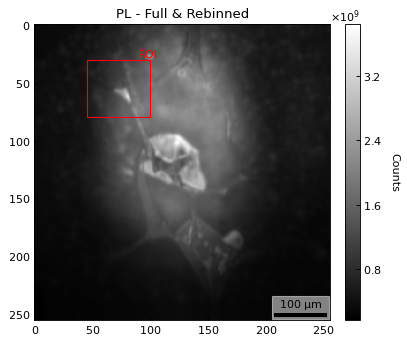

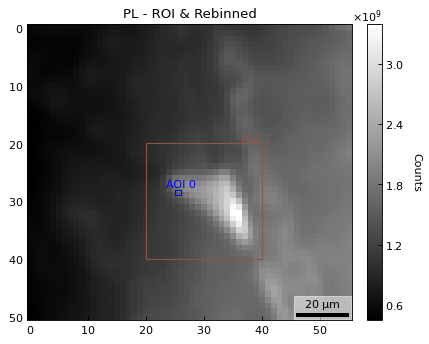

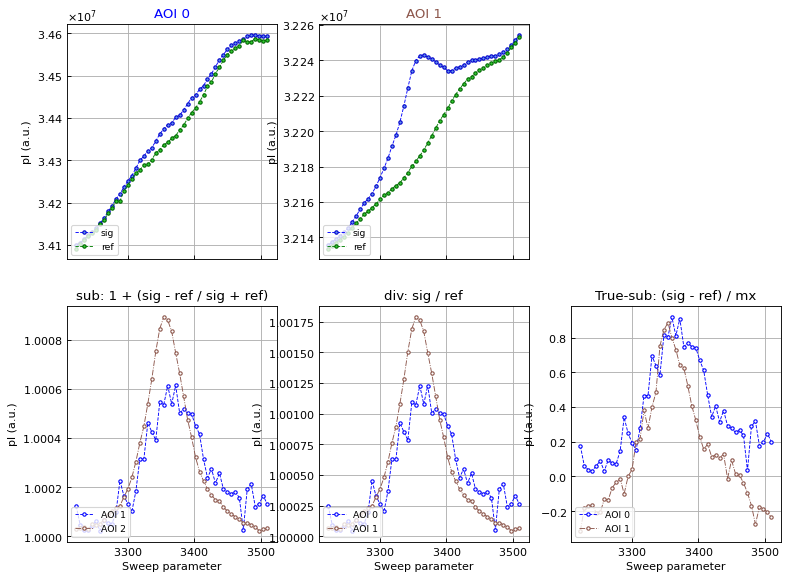

In [9]:
# === PLOT PL INFO
_ = dukit.plot.roi_pl_image(
    pl_img,
    ROI_COORDS,
    opath=OUTPUT_DIR + f"pl_full.{FIG_FORMAT}",
    show_tick_marks=True,
    raw_pixel_size=raw_pixel_size,
    applied_binning=ADDITIONAL_BINS,
)
_ = dukit.plot.aoi_pl_image(
    pl_img_crop,
    *AOI_COORDS,
    opath=OUTPUT_DIR + f"pl_full.{FIG_FORMAT}",
    show_tick_marks=True,
    raw_pixel_size=raw_pixel_size,
    applied_binning=ADDITIONAL_BINS,
)
_ = dukit.plot.aoi_spectra(
    sig,
    ref,
    sweep_arr,
    specpath=OUTPUT_DIR + "aoi_specta.json",
    opath=OUTPUT_DIR + f"aoi_spectra.{FIG_FORMAT}",
    *AOI_COORDS,
)

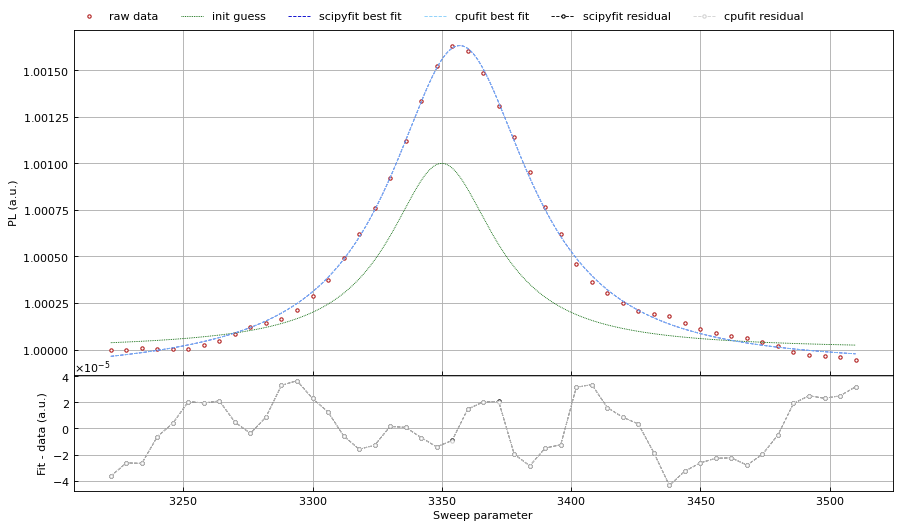

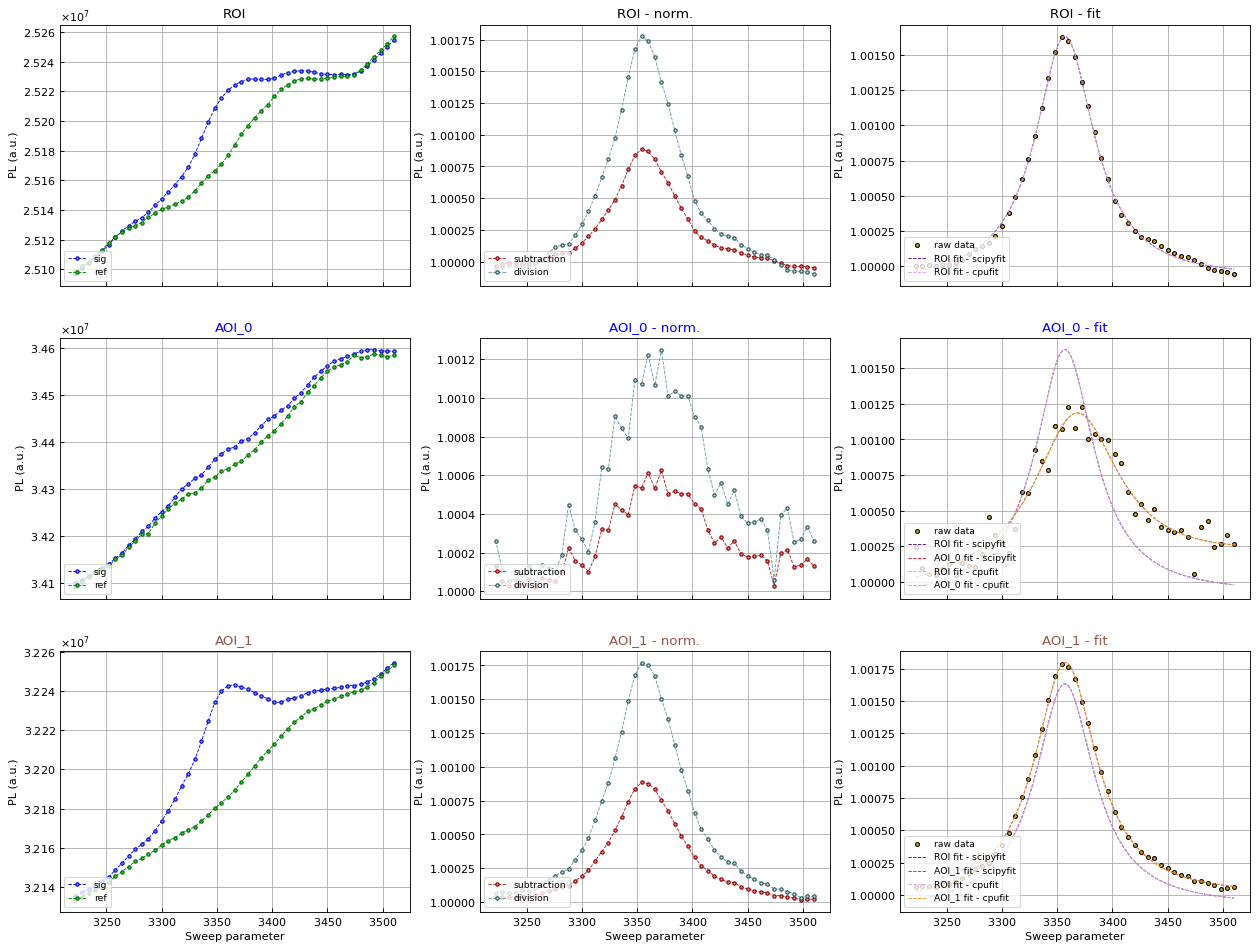

In [10]:
# fit_roi,  roi_avg_fits
roi_fit_results = dukit.fit_roi(
    sig,
    ref,
    sweep_arr,
    FIT_MODEL,
    GUESSES,
    BOUNDS,
    opath=OUTPUT_DIR + f"roi_avg_fit.json",
)
_ = dukit.plot.roi_avg_fits(
    roi_fit_results, opath=OUTPUT_DIR + f"roi_avg_fits.{FIG_FORMAT}"
)

# fit_aois, aoi_avg_fits
aoi_fit_results = dukit.fit_aois(
    sig,
    ref,
    sweep_arr,
    FIT_MODEL,
    GUESSES,
    BOUNDS,
    *AOI_COORDS,
    opath=OUTPUT_DIR + f"aoi_fits.json",
)
_ = dukit.plot.aoi_spectra_fit(
    aoi_fit_results,
    roi_fit_results,
    sig.shape[:-1],
    *AOI_COORDS,
    opath=OUTPUT_DIR + f"aoi_spectra_fit.{FIG_FORMAT}",
)


In [11]:
# fit_all_pixels_pl
if PREV_FIT:
    fit_image_results = dukit.load_fit_results(PREV_FIT, FIT_MODEL)
else:
    fit_image_results = dukit.fit_all_pixels(
        FIT_BACKEND,
        sig_norm,
        sweep_arr,
        FIT_MODEL,
        GUESSES,
        BOUNDS,
        roi_fit_results[FIT_BACKEND],
        odir=FIT_RES_DIR,
    )

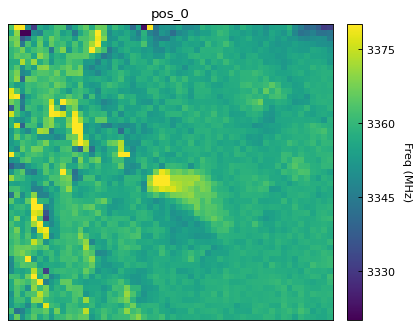

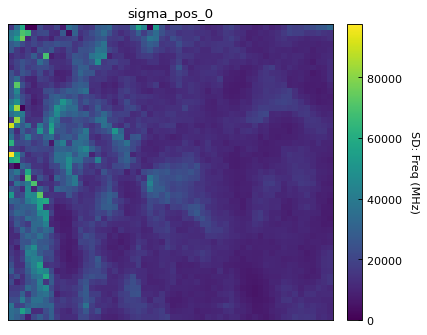

In [12]:
# pl_param_images
_ = dukit.plot.pl_param_images(
    FIT_MODEL,
    fit_image_results,
    "pos",
    opath=OUTPUT_DIR + f"pl_pos.{FIG_FORMAT}",
    raw_pixel_size=raw_pixel_size,
    applied_binning=ADDITIONAL_BINS,
)

_ = dukit.plot.pl_param_images(
    FIT_MODEL,
    fit_image_results,
    "sigma_pos",
    opath=OUTPUT_DIR + f"sigma_pl_pos.{FIG_FORMAT}",
    raw_pixel_size=raw_pixel_size,
    applied_binning=ADDITIONAL_BINS,
    errorplot=True,
)

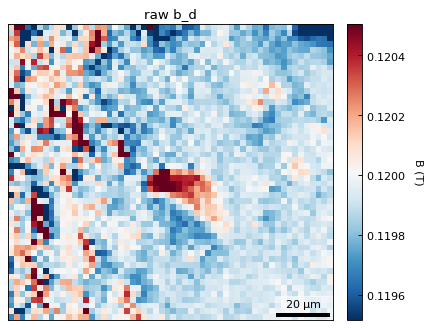

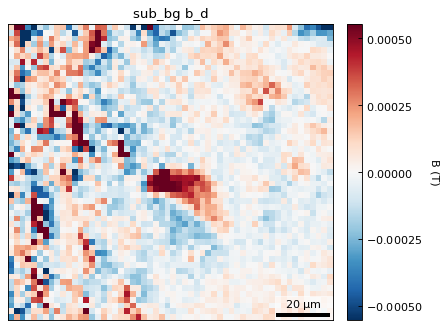

In [14]:
defect = dukit.CPairEnsemble()
b_d = defect.b_defects((fit_image_results["pos_0"],))[0]
# calc b_nv_bg, b_nv_sbg
b_d_bg = dukit.get_background(b_d, "poly", order=2)[0]

b_d_sbg = b_d - b_d_bg

np.savetxt(OUTPUT_DIR + f"/data/b_d_sbg.txt", b_d_sbg)

_ = dukit.plot.b_defects(
    (b_d,),
    name="raw b_d",
    opath=OUTPUT_DIR + f"raw_b_d.{FIG_FORMAT}",
    c_range_type="percentile",
    c_range_values=(2, 98),
    raw_pixel_size=raw_pixel_size,
    applied_binning=ADDITIONAL_BINS,
)
_ = dukit.plot.b_defects(
    (b_d_sbg,),
    name="sub_bg b_d",
    opath=OUTPUT_DIR + f"b_d-sub_bg.{FIG_FORMAT}",
    c_range_type="percentile",
    c_range_values=(2, 98),
    raw_pixel_size=raw_pixel_size,
    applied_binning=ADDITIONAL_BINS,
)